# Binary Classification
In this example, we will walk through two-category classification problem.

The following contents will be covered:
1. 


## Load Raw Data


In [1]:
from sklearn.datasets import make_moons
import numpy as np
X, y = make_moons(n_samples=1024, noise=0.2, random_state=3321)
print(X.shape, y.shape)
print(X[:10])
print(y[:10])

(1024, 2) (1024,)
[[-0.86691851 -0.32027284]
 [ 1.70922817 -0.66094909]
 [ 0.95477398  0.28453102]
 [ 0.14465106  0.33336045]
 [ 0.58070122  0.65058253]
 [ 1.33531488 -0.2647643 ]
 [ 1.46344736 -0.55310411]
 [-1.20787839  0.52778545]
 [ 0.47737585 -0.2020379 ]
 [ 1.45674566 -0.27188258]]
[0 1 0 1 0 1 1 0 1 1]


### Visualize the Data Feature-Wise
Using [matplotlib](https://matplotlib.org/).

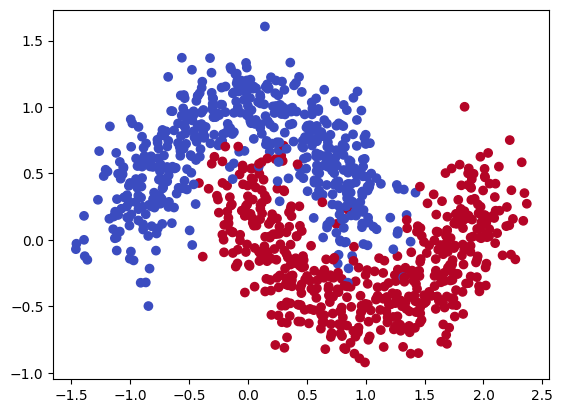

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')


### Regulate the Data
1. Rescale
2. Reshape

(1024, 2) (1024, 1)


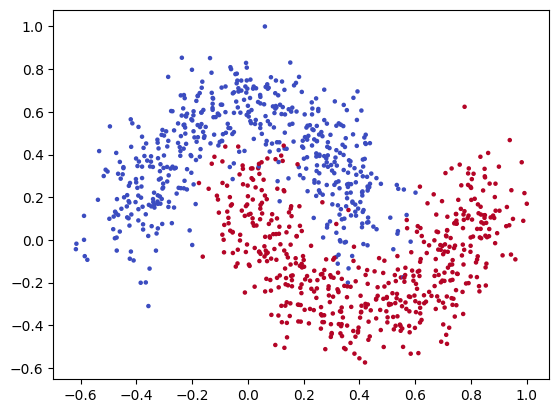

In [23]:
# Rescale 
# age_train_rescale = age_train / 10
# mileage_train_rescale = mileage_train / 1e4
# price_train_rescale = price_train / 1e4
# age_test_rescale = age_test / 10
# mileage_test_rescale = mileage_test / 1e4
# price_test_rescale = price_test / 1e4

# Rescale by max
X_train = X / X.max(axis=0)

# Reshape labels
y_train = y.reshape(-1, 1)
print(X_train.shape, y_train.shape)  # for debug

# Visualize
plt.scatter(X_train[:, 0], X_train[:, 1], s=5*np.ones(y_train.size), c=y_train, cmap='coolwarm')

## Create a Linear Model
A linear model: $\hat{y}=w_1x_1 + w_2x_2 + \dots + w_Nx_N + b$ can predict an entity's property based on its $N$ features. Represent the such a linear model in matrix format leads to:
 
$\hat{\mathbf{y}} = \mathbf{X} \cdot \mathbf{w}^T + \mathbf{b}$

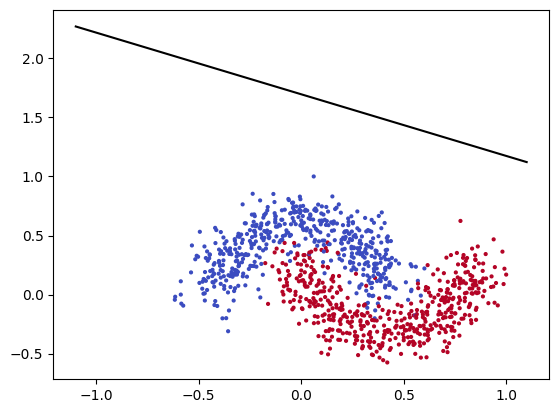

In [22]:
# Define model function
def linear(feature, weight, bias):
    """ Model function
    Args:
        input: feature matrix (independent variables), 2d-array with shape (samples #, features #)
        weight: row vector of weights, 2d-array with shape (1, # features)
        bias: scalar
    Returns:
        output: column vector of predictions (dependent variables), 2d-array with shape (# samples, 1)
    """
    pred = feature @ weight.T + bias
    return pred

# Sanity check
w_dummy = np.array([[1.2, 2.3]]) 
b_dummy = -3.4
y_pred_dummy = linear(X_train, w_dummy, b_dummy)


# Decision boundary
xx = np.linspace(-1.1, 1.1)
yy = (0.5 - b_dummy - w_dummy[0, 0] * xx) / w_dummy[0, 1]
plt.scatter(X_train[:, 0], X_train[:, 1], s=5*np.ones(y_train.size), c=y_train, cmap='coolwarm')
plt.plot(xx, yy, 'k')


## Mean Squared Error (MSE) Loss Function
Define a MSE function to evaluate how good/bad the model was.

In [7]:
def mse_loss(pred, label):
    """ Mean Square Error function
    Args:
        prediction: column vector of predictions, 2d-array with shape (# samples, 1)
        label: column vector of ground truths, 2d-array with shape (# samples, 1)
    Returns:
        loss_value: scalar
    """
    loss_value = np.mean(0.5 * (pred - label) ** 2)
    return loss_value

# Sanity check
loss = mse_loss(pred=linear(X_train, w_dummy, b_dummy), label=y_train)
print(f"mse loss: {loss}")

mse loss: 5.9710476942108075


## Gradient Descent Optimization

### Gradient Descent Iterations

initial parameters: w = [[-4.66786024e-05  3.49623806e-05]], b = -9.427757914486576e-05
loss @ 1 iteration: 0.2500585341441937
loss @ 2 iteration: 0.235589441444955
loss @ 3 iteration: 0.2225289181271669
loss @ 4 iteration: 0.2107316310165357
loss @ 5 iteration: 0.20006738841968624
loss @ 6 iteration: 0.19041956008863214
loss @ 7 iteration: 0.18168366210789744
loss @ 8 iteration: 0.17376608948905992
loss @ 9 iteration: 0.16658298105448682
loss @ 10 iteration: 0.16005920280145805
loss @ 11 iteration: 0.15412743737929396
loss @ 12 iteration: 0.14872736860306796
loss @ 13 iteration: 0.1438049510836879
loss @ 14 iteration: 0.13931175608964608
loss @ 15 iteration: 0.13520438568316043
loss @ 16 iteration: 0.1314439480040452
loss @ 17 iteration: 0.1279955873185591
loss @ 18 iteration: 0.12482806311673897
loss @ 19 iteration: 0.12191337313843834
loss @ 20 iteration: 0.11922641574271252
loss @ 21 iteration: 0.11674468751383303
loss @ 22 iteration: 0.11444801242588776
loss @ 23 iteration: 0.1123

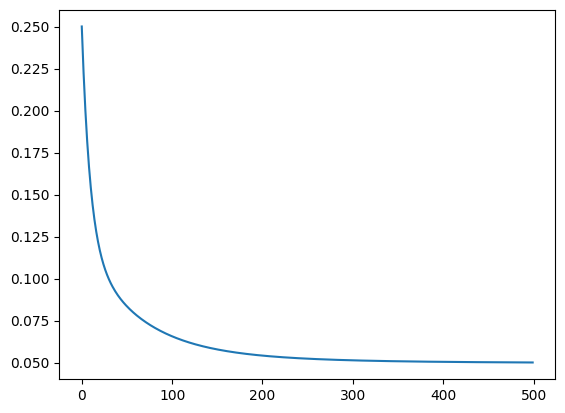

In [15]:
# Define gradient computation function
def grad(feature, pred, label):
    """ Gradient function
    Args:
        feature: feature matrix, 2d-array with shape (# samples, # features)
        pred: column vector of predictions, 2d-array with shape (# samples, 1)
        label: column vector of ground truths, 2d-array with shape (# samples, 1)
    Returns:
        dw: row vector of MSE loss partial derivatives w.r.t. weights, 2d-array with shape (1, # features)
        db: scalar of MSE loss partial derivatives w.r.t. bias
    """
    dw = 1 / label.shape[0] * ((pred - label).T @ feature)  # dL/dw
    db = (pred - label).mean()  # dL/db
    
    return dw, db

# Init parameters
w = np.random.normal(0, 1e-4, (1, 2)) 
b = np.random.normal(0, 1e-4)
print(f"initial parameters: w = {w}, b = {b}")
# Gradient descent optimization
num_iters = 500
learning_rate = 0.05
losses = []
for i in range(num_iters):
    y_pred = linear(X_train, w, b)
    dw, db = grad(X_train, y_pred, y_train)
    loss = mse_loss(y_pred, y_train)
    w = w - learning_rate * dw
    b = b - learning_rate * db
    print(f"loss @ {i+1} iteration: {loss}")
    losses.append(loss)
print(f"final parameters: w = {w}, b = {b}")

# Observe the loss change
plt.plot(losses)

### Visualize Decision Boundary


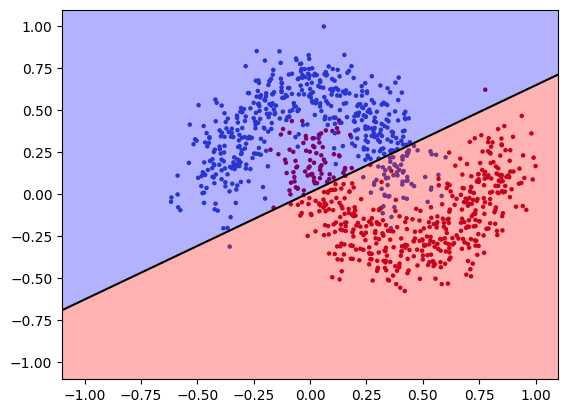

In [32]:
# Credit to ChatGPT
# Create a meshgrid of points over the feature space
xx, yy = np.meshgrid(np.linspace(-1.1, 1.1, 200),
                     np.linspace(-1.1, 1.1, 200))
zz = w[0, 0] * xx + w[0, 1] * yy + b - 0.5


bound_x = np.linspace(-1.1, 1.1)
bound_y = (0.5 - b - w[0, 0] * bound_x) / w[0, 1]
plt.scatter(X_train[:, 0], X_train[:, 1], s=5*np.ones(y_train.size), c=y_train, cmap='coolwarm')
plt.plot(bound_x, bound_y, 'k')
plt.contourf(xx, yy, zz, levels=[-np.inf, 0, np.inf], colors=['blue', 'red'], alpha=0.3)




## Sigmoid Activation
A sigmoid function: $f(x) = 1 / (1 + e^{-x})$ will always output values within [0, 1]

initial parameters: w = [[2.73372243e-05 3.34414752e-05]], b = -2.700221573821906e-05
loss @ 1 iteration: 0.1250002595822285
loss @ 2 iteration: 0.12359608772207592
loss @ 3 iteration: 0.12221940188748817
loss @ 4 iteration: 0.12087008453524362
loss @ 5 iteration: 0.11954798024790893
loss @ 6 iteration: 0.11825289849729
loss @ 7 iteration: 0.1169846163567349
loss @ 8 iteration: 0.11574288115018702
loss @ 9 iteration: 0.1145274130278385
loss @ 10 iteration: 0.11333790745996761
loss @ 11 iteration: 0.11217403764208304
loss @ 12 iteration: 0.11103545680586899
loss @ 13 iteration: 0.1099218004316468
loss @ 14 iteration: 0.10883268835916461
loss @ 15 iteration: 0.10776772679450825
loss @ 16 iteration: 0.10672651021181209
loss @ 17 iteration: 0.10570862314924392
loss @ 18 iteration: 0.10471364189945573
loss @ 19 iteration: 0.10374113609533318
loss @ 20 iteration: 0.10279067019245304
loss @ 21 iteration: 0.10186180485016302
loss @ 22 iteration: 0.1009540982136474
loss @ 23 iteration: 0.100067

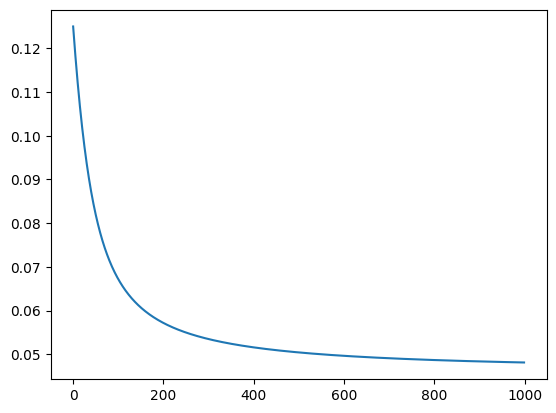

In [42]:
# Define ReLU function
def sigmoid(x):
    """ Sigmoid function
    Args:
        x: independent variable, could be an arrary of any shape or a scalar.
    Returns:
        y: dependent variable, could be an arrary of any shape or a scalar.
    """
    y = 1 / (1 + np.exp(-x))
    return y

# Redefine forward pass. Intermediate result, Z, needs to be tracked 
def forward(feature, weight, bias):
    """ Model function
    Args:
        input: feature matrix (independent variables), 2d-array with shape (# samples, # features)
        weight: row vector of weights, 2d-array with shape (1, # features)
        bias: scalar
    Returns:
        output: column vector of predictions (sigmoid activated outcomes), 2d-array with shape (# samples, 1)
        Z: column vector of intermediate outputs, 2d-array with shape (# samples, 1)
    """
    Z = linear(feature, weight, bias)
    pred = sigmoid(Z)
    return pred

# Redefine gradient function. An exatra step to calculate dL/dZ will be added. 
def grad(feature, pred, label):
    """ Gradient function with sigmoid activation
    Args:
        feature: feature matrix, 2d-array with shape (# samples, # features)
        pred: column vector of predictions, 2d-array with shape (# samples, 1)
        label: column vector of ground truths, 2d-array with shape (# samples, 1)
        Z: column vector of intermediate outputs, 2d-array with shape (# samples, 1)
    Returns:
        dw: row vector of MSE loss partial derivatives w.r.t. weights, 2d-array with shape (1, # features)
        db: scalar of MSE loss partial derivatives w.r.t. bias
    """
    dZ = (pred - label) * pred * (1 - pred)
    dw = 1 / label.shape[0] * (dZ.T @ feature)
    db = dZ.mean()
    
    return dw, db

# Optimization with ReLU activation
w = np.random.normal(0, 1e-4, (1, 2)) 
b = np.random.normal(0, 1e-4)
print(f"initial parameters: w = {w}, b = {b}")
num_iters = 1000
learning_rate = 0.9
losses = []
for i in range(num_iters):
    y_pred = forward(X_train, w, b)
    dw, db = grad(X_train, y_pred, y_train)
    loss = mse_loss(y_pred, y_train)
    w = w - learning_rate * dw
    b = b - learning_rate * db
    print(f"loss @ {i+1} iteration: {loss}")
    # print(f"w = {w}, b = {b}")
    losses.append(loss)
print(f"final parameters: w = {w}, b = {b}")

# Observe loss values
plt.plot(losses)

### Visualize Sigmoid Function Activated Model Decision

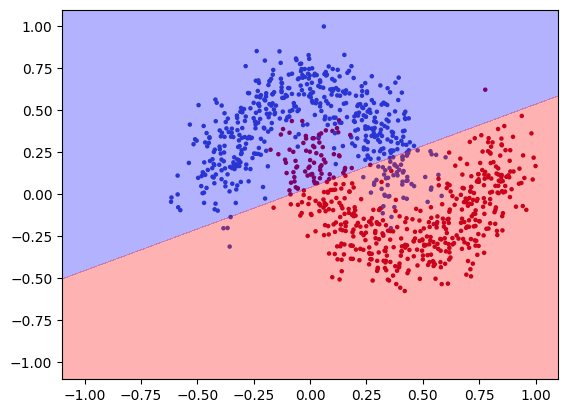

In [43]:
# Credit to ChatGPT
# Create a meshgrid of points over the feature space
xx, yy = np.meshgrid(np.linspace(-1.1, 1.1, 200),
                     np.linspace(-1.1, 1.1, 200))
zz = sigmoid(w[0, 0] * xx + w[0, 1] * yy + b) - 0.5


# bound_x = np.linspace(-1.1, 1.1)
# bound_y = (0.5 - b - w[0, 0] * bound_x) / w[0, 1]
plt.scatter(X_train[:, 0], X_train[:, 1], s=5*np.ones(y_train.size), c=y_train, cmap='coolwarm')
# plt.plot(bound_x, bound_y, 'k')
plt.contourf(xx, yy, zz, levels=[-np.inf, 0, np.inf], colors=['blue', 'red'], alpha=0.3)




### Test Sigmoid Activated Model

In [ ]:
fig = plt.figure()
fig.set_figwidth(7)
fig.set_figheight(7)
ax = fig.add_subplot(111, projection='3d')
# Define the grid of points for the plane
z_mesh = sigmoid(w[0, 0] * x_mesh + w[0, 1] * y_mesh + b)
# Plot the data
ax.scatter3D(X_test[:, 0], X_test[:, 1], y_test.squeeze(), s=np.ones(y_test.size), c=y_test.squeeze(), cmap='coolwarm') 
ax.plot_surface(x_mesh, y_mesh, z_mesh, cmap='cool', linewidth=0, antialiased=False, alpha=0.4)

ax.set_xlabel(f'Age ({age_test.max()} yrs)')
ax.set_ylabel(f'Mileage ({mileage_test.max()} miles)')
ax.set_zlabel(f'Price (${price_test.max()})')
# ax.zaxis.labelpad = -0.5 # display z label

ax.view_init(elev=30, azim=-45)  # set elevation and azimuth of viewing angle

Featurewise assessing

In [ ]:
# Visualize model on training data
fig, axs = plt.subplots(2,1)  # Initialize figures in 2 rows, 1 column
fig.set_figwidth(8)  # set figure size
fig.set_figheight(10)
axs[0] = plt.subplot(2,1,1)  # plot in the first figure
axs[0].plot(X_test[:, 0], y_test, '.', markersize=1)  # draw blue dots
axs[0].plot(X_test[:, 0], forward(X_test, w, b).squeeze(), 'r+', markersize=1)  # draw red '+' markers
axs[0].set(xlabel=f'Age (Unit: {age_train.max()} years)', ylabel=f'Price (Unit: ${price_train.max()})')  # label axes
axs[0].grid()
axs[1] = plt.subplot(2,1,2)
axs[1].plot(X_test[:, 1], y_test, '.', markersize=1)
axs[1].plot(X_test[:, 1], forward(X_test, w, b).squeeze(), 'r+', markersize=1)  # draw red '+' markers
axs[1].set(xlabel=f'Mileage (Unit: {mileage_train.max()} miles)', ylabel=f'Price (Unit: ${price_train.max()})')
axs[1].grid()

## ReLU Activation
Negative car price does not make sense. The output needs to be regulated to only output non-negative value.

In [ ]:
# Define ReLU function
def relu(x):
    """ ReLU function
    Args:
        x: independent variable, could be an arrary of any shape or a scalar.
    Returns:
        y: dependent variable, could be an arrary of any shape or a scalar.
    """
    # y = x.copy()
    y = x
    y[x<=0] = 0
    return y

# Define derivatives of ReLU function
def d_relu(x):
    """ Derivative of ReLU function
    Args:
        x: independent variable, could be an arrary of any shape or a scalar.
    Returns:
        dydx: dependent variable, could be an arrary of any shape or a scalar.
    """
    dydx = np.zeros_like(x)
    dydx[x>0] = 1
    return dydx

# Redefine forward pass. Intermediate result, Z, needs to be tracked 
def forward(input, weight, bias):
    """ Model function
    Args:
        input: feature matrix (independent variables), 2d-array with shape (# samples, # features)
        weight: row vector of weights, 2d-array with shape (1, # features)
        bias: scalar
    Returns:
        output: column vector of predictions (sigmoid activated outcomes), 2d-array with shape (# samples, 1)
        Z: column vector of intermediate outputs, 2d-array with shape (# samples, 1)
    """
    Z = linear(input, weight, bias)
    output = relu(Z)
    return output, Z

# Redefine gradient function. An exatra step to calculate dL/dZ will be added. 
def grad(input, prediction, target, Z):
    """ Gradient function with sigmoid activation
    Args:
        prediction: column vector of predictions, 2d-array with shape (# samples, 1)
        target: column vector of ground truths, 2d-array with shape (# samples, 1)
        Z: column vector of intermediate outputs, 2d-array with shape (# samples, 1)
        feature: feature matrix, 2d-array with shape (# samples, # features)
    Returns:
        dw: row vector of MSE loss partial derivatives w.r.t. weights, 2d-array with shape (1, # features)
        db: scalar of MSE loss partial derivatives w.r.t. bias
    """
    dZ = (prediction - target) * d_relu(Z)
    dw = 1 / target.shape[0] * np.dot(dZ.T, input)
    db = dZ.mean()
    
    return dw, db

# Optimization with ReLU activation
w = np.zeros((1, 2)) + np.random.normal(0, 1e-4, (1, 2)) 
b = 0 + np.random.normal(0, 1e-4)
num_iters = 2000
learning_rate = 0.02
losses = []
for i in range(num_iters):
    y_pred, Z = forward(X_train, w, b)
    dw, db = grad(X_train, y_pred, y_train, Z)
    loss = mse_loss(y_pred, y_train)
    w = w - learning_rate * dw
    b = b - learning_rate * db
    print(f"loss @ {i+1} iteration: {loss}")
    # print(f"w = {w}, b = {b}")
    losses.append(loss)
print(f"updated w={w}, b={b}")
print(f"Model's mse on test data: {mse_loss(forward(X_test, w, b), y_test)}")

# Observe loss values
plt.plot(losses)

## Visualize ReLU Activated Model

In [ ]:
y_test_pred, _ = forward(X_test, w, b)
print(f"Model's mse on test data: {mse_loss(y_test_pred, y_test)}")

# Visualize model on two dimensions
y_test_pred, _ = forward(X_test, w, b)
fig, axs = plt.subplots(2,1)
fig.set_figwidth(8)
fig.set_figheight(10)
axs[0] = plt.subplot(2,1,1)
axs[0].plot(X_test[:, 0], y_test, '.', markersize=1)
axs[0].plot(X_test[:, 0], y_test_pred, 'r+', markersize=1)
axs[0].set(xlabel=f'Age (Unit: {age_train.max()} years)', ylabel=f'Price (Unit: ${price_train.max()})')
axs[1] = plt.subplot(2,1,2)
axs[1].plot(X_test[:, 1], y_test, '.', markersize=1)
axs[1].plot(X_test[:, 1], y_test_pred, 'r+', markersize=1)
axs[1].set(xlabel=f'Mileage (Unit: {mileage_train.max()} miles)', ylabel=f'Price (Unit: ${price_train.max()})')

In [ ]:
fig = plt.figure()
fig.set_figwidth(7)
fig.set_figheight(7)
ax = fig.add_subplot(111, projection='3d')
# Define the grid of points for the plane
z_mesh = relu(w[0, 0] * x_mesh + w[0, 1] * y_mesh + b)
# Plot the data
ax.scatter3D(X_test[:, 0], X_test[:, 1], y_test.squeeze(), s=np.ones(y_test.size), c=y_test.squeeze(), cmap='coolwarm') 
ax.plot_surface(x_mesh, y_mesh, z_mesh, cmap='cool', linewidth=0, antialiased=False, alpha=0.4)

ax.set_xlabel(f'Age ({age_test.max()} yrs)')
ax.set_ylabel(f'Mileage ({mileage_test.max()} miles)')
ax.set_zlabel(f'Price (${price_test.max()})')
ax.zaxis.labelpad = -0.5 # display z label

ax.view_init(elev=30, azim=-45)  # set elevation and azimuth of viewing angle

## 